In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Quora-Duplicate-question.csv')
# Display the first 5 rows
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [2]:
# Target variable
target = 'is_duplicate'

# Check the distribution of the target variable
df[target].value_counts()

is_duplicate
0    255027
1    149263
Name: count, dtype: int64

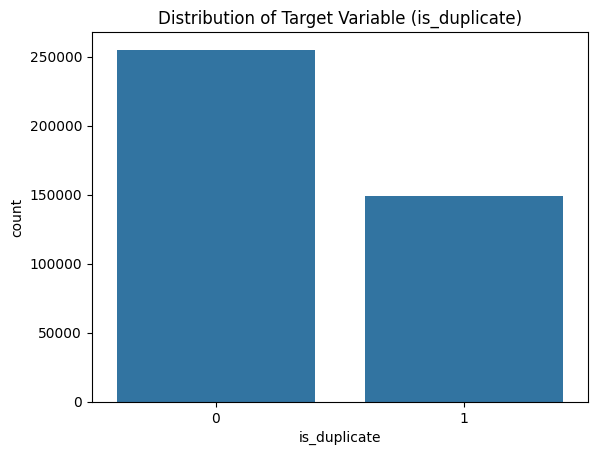

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
sns.countplot(x=target, data=df)
plt.title('Distribution of Target Variable (is_duplicate)')
plt.show()

In [4]:
# Basic info about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [5]:
# Check for missing values in 'question1' and 'question2'
print(df['question1'].isnull().sum())
print(df['question2'].isnull().sum())

# Drop rows with missing values in 'question1' or 'question2'
df = df.dropna(subset=['question1', 'question2'])

# Create new features like length of questions, difference in lengths, etc.
df['q1_length'] = df['question1'].apply(len)
df['q2_length'] = df['question2'].apply(len)
df['length_diff'] = abs(df['q1_length'] - df['q2_length'])

# Display the new features
df[['q1_length', 'q2_length', 'length_diff']].head()

1
2


,q1_length,q2_length,length_diff
0,66,57,9
1,51,88,37
2,73,59,14
3,50,65,15
4,76,39,37


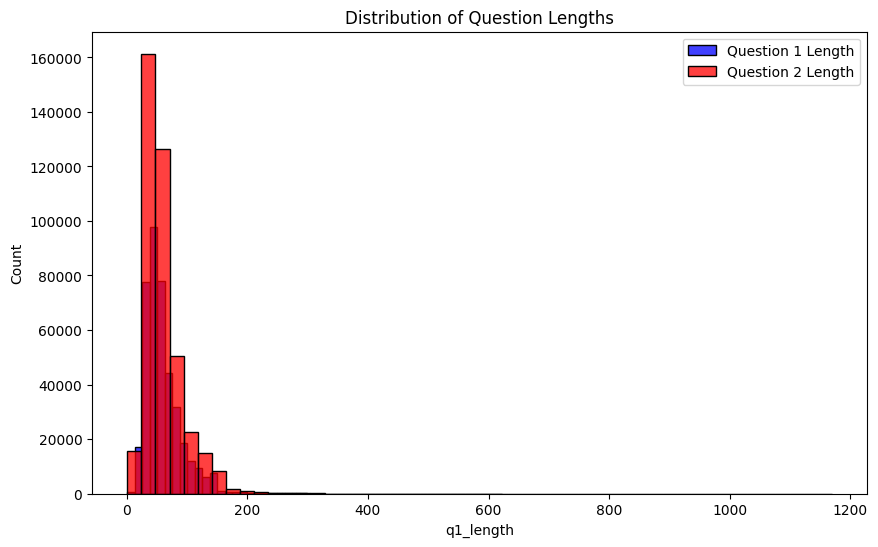

In [6]:
# Histogram of question lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['q1_length'], bins=50, color='blue', label='Question 1 Length')
sns.histplot(df['q2_length'], bins=50, color='red', label='Question 2 Length')
plt.legend()
plt.title('Distribution of Question Lengths')
plt.show()

In [7]:
# Drop unnecessary columns
df = df.drop(['id', 'qid1', 'qid2'], axis=1)
df.head()

,question1,question2,is_duplicate,q1_length,q2_length,length_diff
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,9
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,37
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,15
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,37


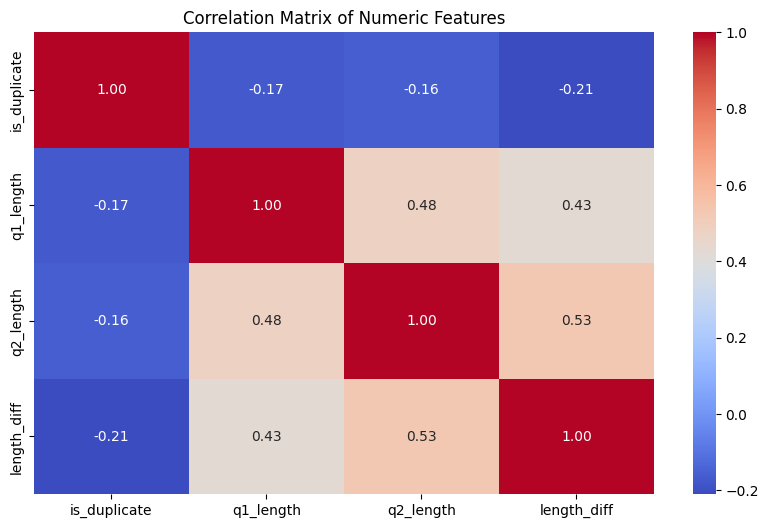

In [8]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=[np.number])

# Check correlation of numeric features with the target variable
corr_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

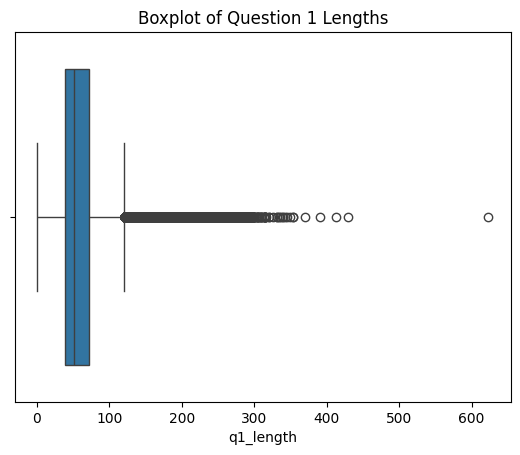

In [9]:
# Check for outliers in question lengths
sns.boxplot(x=df['q1_length'])
plt.title('Boxplot of Question 1 Lengths')
plt.show()

# Remove outliers (example: questions longer than 200 characters)
df = df[df['q1_length'] <= 200]
df = df[df['q2_length'] <= 200]

In [10]:
# Drop rows with missing values
df = df.dropna()

# Verify no missing values remain
df.isnull().sum()

question1       0
question2       0
is_duplicate    0
q1_length       0
q2_length       0
length_diff     0
dtype: int64

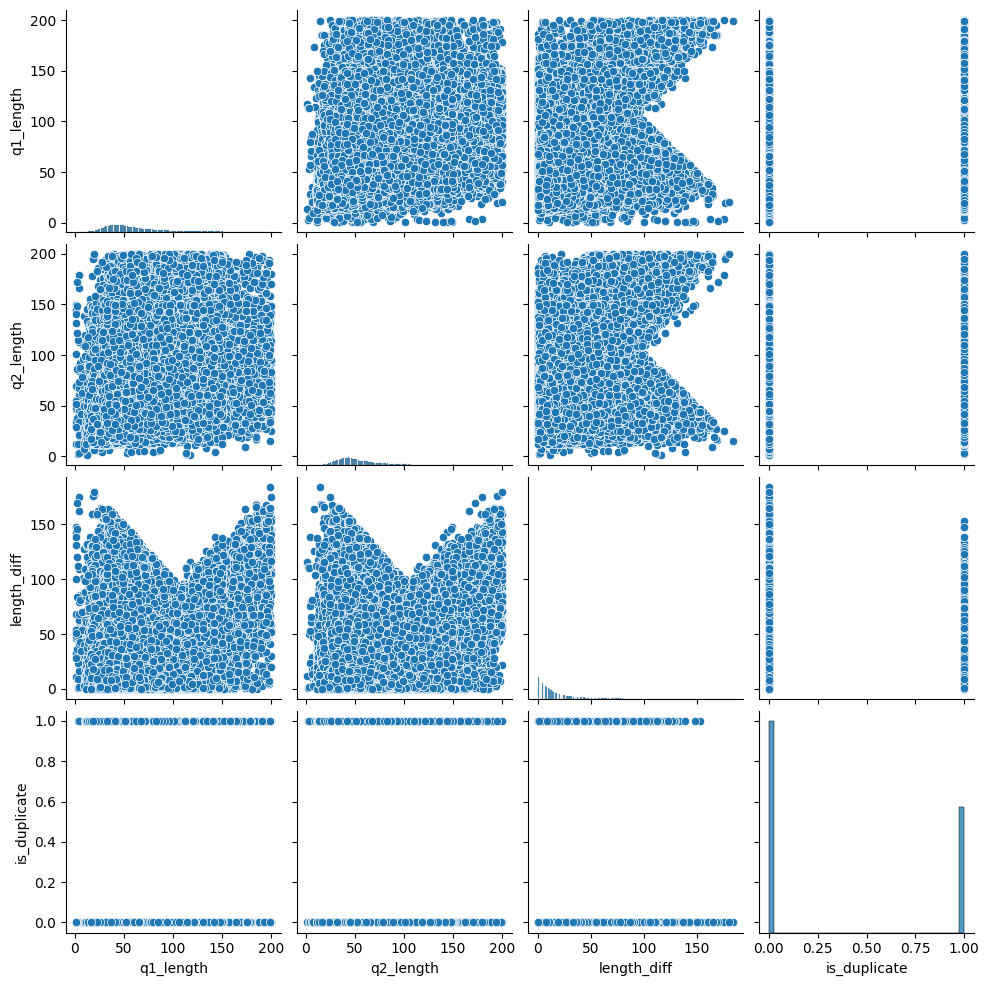

In [11]:
# Pairplot for numerical features
sns.pairplot(df[['q1_length', 'q2_length', 'length_diff', target]])
plt.show()

In [12]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate correlation with the target variable
corr_with_target = numeric_columns.corr()[target].sort_values(ascending=False)

# Display the correlation values
print(corr_with_target)

is_duplicate    1.000000
q2_length      -0.156523
q1_length      -0.164675
length_diff    -0.213488
Name: is_duplicate, dtype: float64


In [13]:
# Use TF-IDF or word embeddings for text data
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine questions for vectorization
questions = list(df['question1']) + list(df['question2'])

# Fit TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(questions)

# Split back into question1 and question2
tfidf_q1 = tfidf_matrix[:len(df)]
tfidf_q2 = tfidf_matrix[len(df):]

In [14]:
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score

# Combine TF-IDF matrices for question1 and question2 using sparse hstack
X = hstack((tfidf_q1, tfidf_q2))

# Target variable
y = df[target]

# Split data into train and test sets (using sparse matrices)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Fold Cross Validation (using sparse matrices)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"{name} Test Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")
    print("-" * 50)

Training Logistic Regression...
Logistic Regression Test Accuracy: 0.7421
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81     50467
           1       0.70      0.54      0.61     29769

    accuracy                           0.74     80236
   macro avg       0.73      0.70      0.71     80236
weighted avg       0.74      0.74      0.73     80236

--------------------------------------------------
Training Random Forest...
Random Forest Test Accuracy: 0.8060
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.93      0.86     50467
           1       0.84      0.59      0.69     29769

    accuracy                           0.81     80236
   macro avg       0.82      0.76      0.78     80236
weighted avg       0.81      0.81      0.80     80236

--------------------------------------------------


In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the best model (RandomForest)
best_model = RandomForestClassifier(random_state=42)

# Train the model on the full training data
best_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test data
y_pred = best_model.predict(X_test)

# Evaluate performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.8060471608754175

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86     50467
           1       0.84      0.59      0.69     29769

    accuracy                           0.81     80236
   macro avg       0.82      0.76      0.78     80236
weighted avg       0.81      0.81      0.80     80236


Confusion Matrix:
 [[47103  3364]
 [12198 17571]]


In [24]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'quora_duplicate_rf_model.pkl')

# Load the model (for future use)
loaded_model = joblib.load('quora_duplicate_rf_model.pkl')

In [25]:
# Save the TF-IDF vectorizer (if needed)
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']